In [1]:
using Pkg
Pkg.activate("..")

  Activating project at `~/PauliSampling.jl`


In [2]:
using PauliPropagation
using PauliSampling
using Plots
using DataFrames
using PrettyTables 
using Printf

Running nq = 2
Running nq = 3
Running nq = 4
Running nq = 5
Running nq = 6
Running nq = 7
Running nq = 8
Running nq = 9


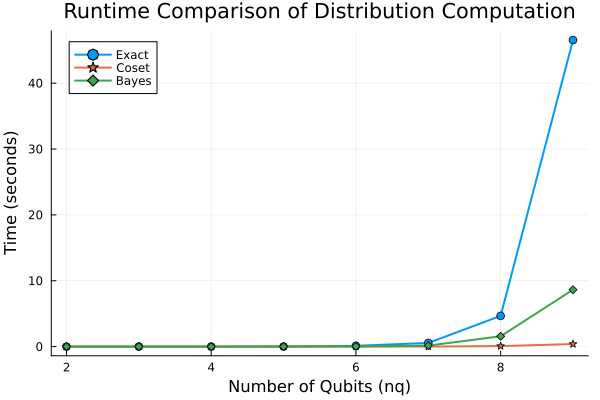

In [5]:
nq_range = 2:9
times_exact = Float64[]
times_coset = Float64[]
times_bayes = Float64[]

for nq in nq_range
    println("Running nq = $nq")
    
    init_psum = zero_state(nq)
    max_weight = min(max(1, nq ÷ 2), 4)
    circuit_nq = build_circuit(nq)
    nparams = countparameters(circuit_nq)
    thetas = randn(nparams) * 0.5

    exact_psum = propagate(circuit_nq, init_psum, thetas)
    trunc_psum = propagate(circuit_nq, init_psum, thetas; max_weight=max_weight)

    # Time each get_dist call
    t_exact = @elapsed PauliSampling.get_dist(exact_psum, approximate_prob)
    t_coset = @elapsed PauliSampling.get_dist(trunc_psum, projection_prob)
    t_bayes = @elapsed PauliSampling.get_dist(trunc_psum, approximate_prob)

    push!(times_exact, t_exact)
    push!(times_coset, t_coset)
    push!(times_bayes, t_bayes)
end

# Plotting
plot(nq_range, times_exact, label="Exact", lw=2, marker=:o)
plot!(nq_range, times_coset, label="Coset", lw=2, marker=:s)
plot!(nq_range, times_bayes, label="Bayes", lw=2, marker=:d)
xlabel!("Number of Qubits (nq)")
ylabel!("Time (seconds)")
title!("Runtime Comparison of Distribution Computation")

Running nq = 2
Running nq = 3
Running nq = 4
Running nq = 5
Running nq = 6
Running nq = 7
Running nq = 8
Running nq = 9
Running nq = 10
Running nq = 11


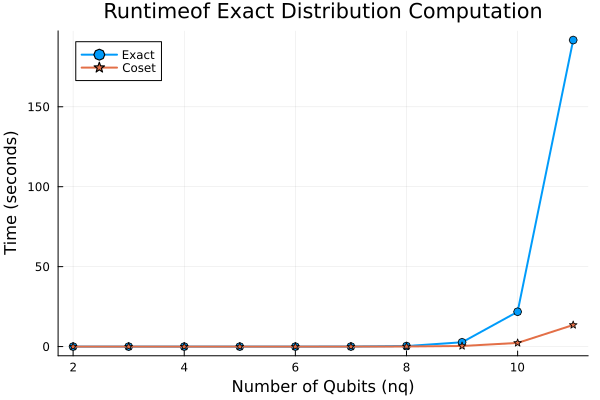

In [7]:
nq_range = 2:11
times_exact = Float64[]
times_coset = Float64[]

for nq in nq_range
    println("Running nq = $nq")
    
    init_psum = zero_state(nq)
    max_weight = min(max(1, nq ÷ 2), 4)
    circuit_nq = build_circuit(nq)
    nparams = countparameters(circuit_nq)
    thetas = randn(nparams) * 0.5

    exact_psum = propagate(circuit_nq, init_psum, thetas)
    trunc_psum = propagate(circuit_nq, init_psum, thetas; max_weight=max_weight)

    # Time each get_dist call
    t_exact = @elapsed PauliSampling.get_dist(exact_psum, projection_prob)
    t_coset = @elapsed PauliSampling.get_dist(trunc_psum, projection_prob)

    push!(times_exact, t_exact)
    push!(times_coset, t_coset)
end

# Plotting
plot(nq_range, times_exact, label="Exact", lw=2, marker=:o)
plot!(nq_range, times_coset, label="Coset", lw=2, marker=:s)
xlabel!("Number of Qubits (nq)")
ylabel!("Time (seconds)")
title!("Runtimeof Exact Distribution Computation")

Running nq = 2
Running nq = 3
Running nq = 4
Running nq = 5
Running nq = 6
Running nq = 7
Running nq = 8
Running nq = 9


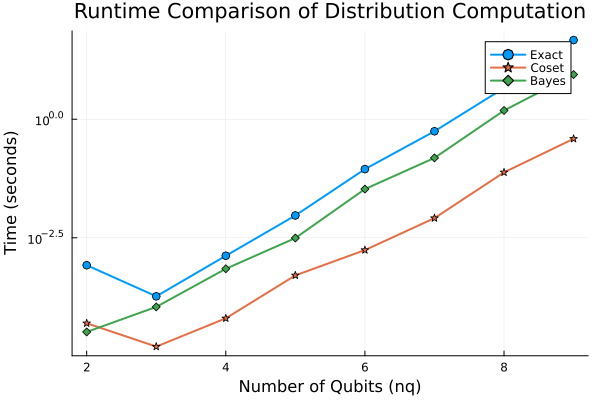

In [8]:
nq_range = 2:9
times_exact = Float64[]
times_coset = Float64[]
times_bayes = Float64[]

for nq in nq_range
    println("Running nq = $nq")
    
    init_psum = zero_state(nq)
    max_weight = min(max(1, nq ÷ 2), 4)
    circuit_nq = build_circuit(nq)
    nparams = countparameters(circuit_nq)
    thetas = randn(nparams) * 0.5

    exact_psum = propagate(circuit_nq, init_psum, thetas)
    trunc_psum = propagate(circuit_nq, init_psum, thetas; max_weight=max_weight)

    # Time each get_dist call
    t_exact = @elapsed PauliSampling.get_dist(exact_psum, approximate_prob)
    t_coset = @elapsed PauliSampling.get_dist(trunc_psum, projection_prob)
    t_bayes = @elapsed PauliSampling.get_dist(trunc_psum, approximate_prob)

    push!(times_exact, t_exact)
    push!(times_coset, t_coset)
    push!(times_bayes, t_bayes)
end

# Plotting
plot(nq_range, times_exact, label="Exact", lw=2, marker=:o, yaxis=:log)
plot!(nq_range, times_coset, label="Coset", lw=2, marker=:s)
plot!(nq_range, times_bayes, label="Bayes", lw=2, marker=:d)
xlabel!("Number of Qubits (nq)")
ylabel!("Time (seconds)")
title!("Runtime Comparison of Distribution Computation")

-----

## Distribution distances

In [11]:
nq = 5
init_psum = zero_state(nq)
circuit = build_circuit(nq)
nparams = countparameters(circuit)
thetas = randn(nparams) * 0.5

max_weight = min(max(1, nq ÷ 2), 4)
min_abs_coeff = 1e-5

exact_prop_psum = propagate(circuit, init_psum, thetas)
trunc_prop_psum = propagate(circuit, init_psum, thetas; min_abs_coeff = min_abs_coeff, max_weight=max_weight)
@show length(exact_prop_psum.terms);
@show length(trunc_prop_psum.terms);

length(exact_prop_psum.terms) = 1024
length(trunc_prop_psum.terms) = 106


In [12]:
function tvd(p, q)
    0.5 * sum(abs.(p .- q))
end

tvd (generic function with 1 method)

In [13]:
psums = [
    ("Exact PSum", exact_prop_psum),
    ("Trunc PSum", trunc_prop_psum)
]

probs = [
    ("Exact Algo", projection_prob),
    ("Approx Algo", approximate_prob)
]

dists = []

for (qname, qprob) in probs, (pname, psum) in psums
    name = "$(qname), $(pname)"
    push!(dists, (name, get_dist(psum, qprob)))
end

In [18]:
# TODO: The table is too wide.
names = first.(dists)
n = length(names)

# Compute TVD matrix
tvd_matrix = [tvd(dists[i][2], dists[j][2]) for i in 1:n, j in 1:n]

# Build DataFrame
df = DataFrame(tvd_matrix, Symbol.(names))
insertcols!(df, 1, :Dist => names)

# Pretty print without type row and row numbers
pretty_table(df;
    backend = Val(:html),
    header = ["", names...],
    formatters = ft_printf("%.10f")
)

,"Exact Algo, Exact PSum","Exact Algo, Trunc PSum","Approx Algo, Exact PSum","Approx Algo, Trunc PSum"
"Exact Algo, Exact PSum",0.0000000000,0.4447722735,0.0000000000,0.3619121587
"Exact Algo, Trunc PSum",0.4447722735,0.0000000000,0.4447722735,0.2206789436
"Approx Algo, Exact PSum",0.0000000000,0.4447722735,0.0000000000,0.3619121587
"Approx Algo, Trunc PSum",0.3619121587,0.2206789436,0.3619121587,0.0000000000


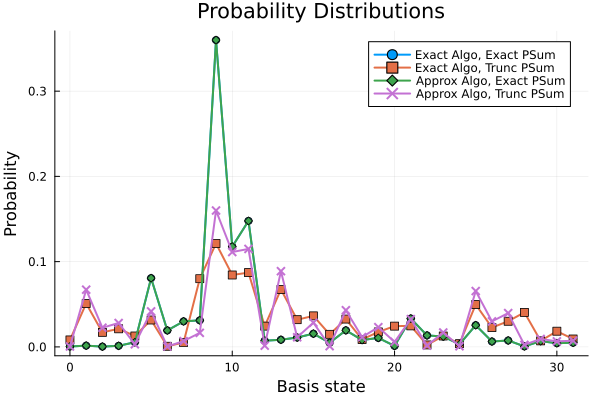

In [19]:
x = 0:length(dists[1][2]) - 1
markers = [:circle, :square, :diamond, :xcross, :star5, :utriangle, :hexagon]

plt = plot(legend = :topright)  # set legend position here

for (i, (label, dist)) in enumerate(dists)
    plot!(plt, x, dist;
        label = label,
        lw = 2,
        marker = markers[mod1(i, length(markers))])
end

xlabel!("Basis state")
ylabel!("Probability")
title!("Probability Distributions")

display(plt)

nq = 1
nq = 2
nq = 3
nq = 4
nq = 5
nq = 6
nq = 7
nq = 8


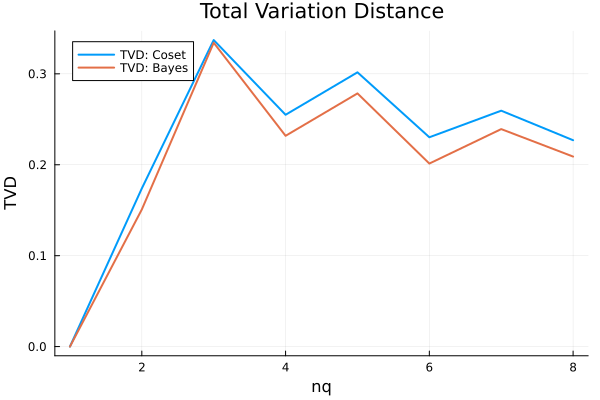

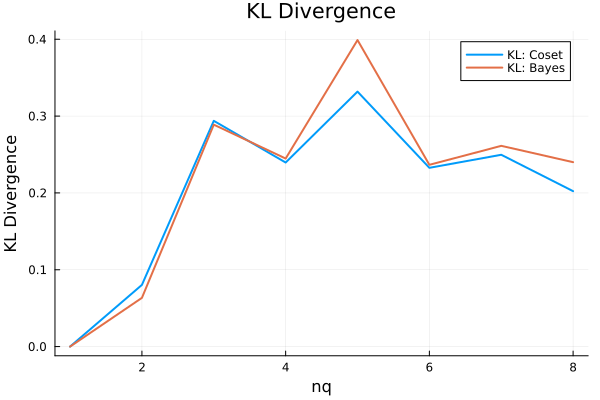

In [29]:
max_nq = 8
x_distances = collect(1:max_nq)
tvd_coset = fill(0.0, max_nq)
tvd_bayes = fill(0.0, max_nq)
kl_coset  = fill(0.0, max_nq)
kl_bayes  = fill(0.0, max_nq)

M = 5

for nq in x_distances
    @show nq
    flush(stdout)
    init_psum = zero_state(nq)
    max_weight = min(max(1, nq ÷ 2), 4)
    circuit_nq = build_circuit(nq)
    nparams = countparameters(circuit_nq)
    for _ in 1:M
        thetas = randn(nparams) * 0.5;
        exact_psum = propagate(circuit_nq, init_psum, thetas)
        trunc_psum = propagate(circuit_nq, init_psum, thetas; max_weight=max_weight)
    
        exact_dist = PauliSampling.get_dist(exact_psum, approximate_prob)
        coset_dist = PauliSampling.get_dist(trunc_psum, projection_prob)
        bayes_dist = PauliSampling.get_dist(trunc_psum, approximate_prob)
    
        tvd_coset[nq] += PauliSampling.tvd(exact_dist, coset_dist)
        kl_coset[nq] += PauliSampling.kl_div(exact_dist, coset_dist)
        tvd_bayes[nq] += PauliSampling.tvd(exact_dist, bayes_dist)
        kl_bayes[nq] += PauliSampling.kl_div(exact_dist, bayes_dist)
    end
end

tvd_coset /= M
kl_coset /= M
tvd_bayes /= M
kl_bayes /= M

plt_tvd = plot(x_distances, tvd_coset, label="TVD: Coset", lw=2, xlabel="nq", ylabel="TVD", title="Total Variation Distance")
plot!(x_distances, tvd_bayes, label="TVD: Bayes", lw=2)
display(plt_tvd)

plt_kl = plot(x_distances, kl_coset, label="KL: Coset", lw=2, xlabel="nq", ylabel="KL Divergence", title="KL Divergence")
plot!(x_distances, kl_bayes, label="KL: Bayes", lw=2)
display(plt_kl)

nq = 1
nq = 2
nq = 3
nq = 4
nq = 5
nq = 6
nq = 7
nq = 8


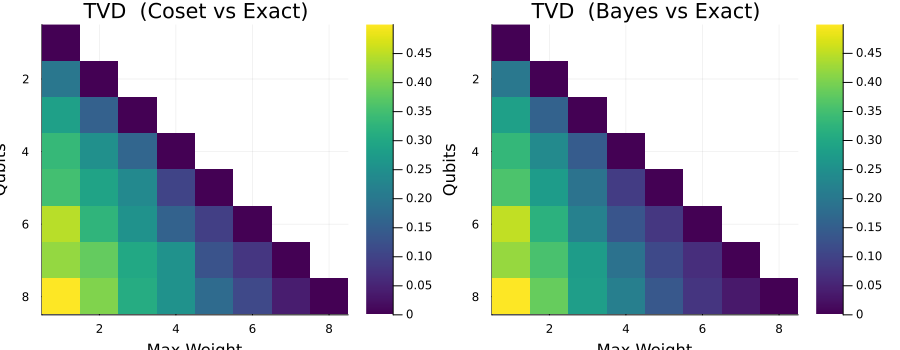

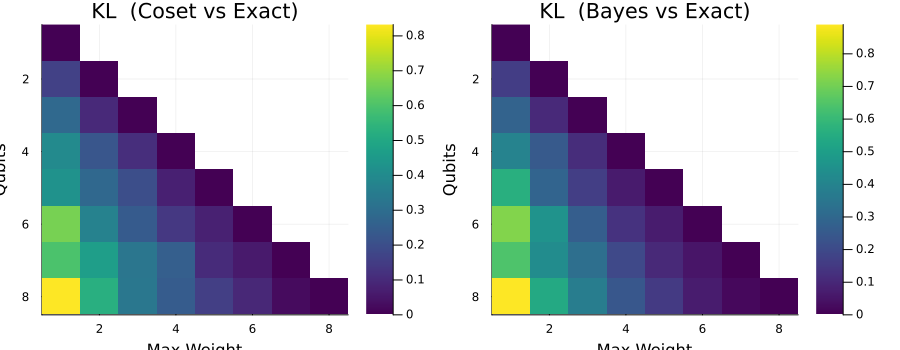

In [3]:
max_nq = 8
M = 5
weight_axis = 1:max_nq

tvd_coset_map = fill(NaN, max_nq, max_nq)
tvd_bayes_map = fill(NaN, max_nq, max_nq)
kl_coset_map = fill(NaN, max_nq, max_nq)
kl_bayes_map = fill(NaN, max_nq, max_nq)

for nq in 1:max_nq
    @show nq
    flush(stdout)
    for w in 1:nq
        tvc, klc, tvb, klb = avg_metrics_for_weight(nq, w, M)
        tvd_coset_map[nq, w] = tvc
        kl_coset_map[nq,  w] = klc
        tvd_bayes_map[nq, w] = tvb
        kl_bayes_map[nq,  w] = klb
    end
end

function pretty_heat(mat, title_str)
    heatmap(weight_axis,
            1:max_nq,
            mat; 
            xlabel = "Max Weight",
            ylabel = "Qubits",
            yflip  = true,
            c = :viridis,
            title = title_str,
            clims = (0, maximum(skipmissing(mat))))
end

tvd_plots = plot(pretty_heat(tvd_coset_map, "TVD  (Coset vs Exact)"),
     pretty_heat(tvd_bayes_map, "TVD  (Bayes vs Exact)");
     layout = (1,2), size = (900,350))
display(tvd_plots)

kl_plots = plot(pretty_heat(kl_coset_map,  "KL  (Coset vs Exact)"),
     pretty_heat(kl_bayes_map,  "KL  (Bayes vs Exact)");
     layout = (1,2), size = (900,350))
display(kl_plots)

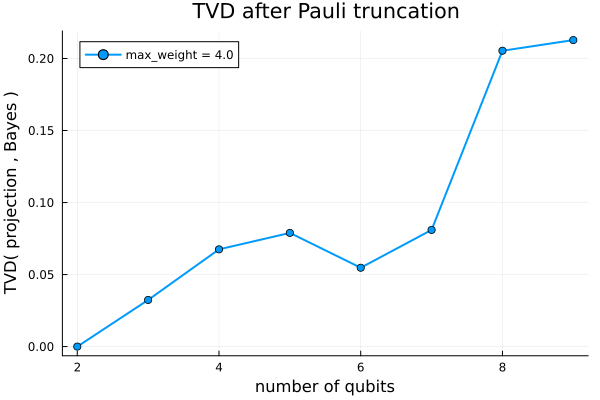

In [ ]:
nqs   = 2:9
tvds  = Float64[]


for nq in nqs
    weight_cut = min(max(2,nq/2),4)
    init_psum = zero_state(nq)
    circuit_nq = build_circuit(nq)
    nparams = countparameters(circuit_nq)
    thetas = randn(nparams) * 0.5;
    trunc_psum = propagate(circuit_nq, init_psum, thetas; max_weight=weight_cut)

    coset_dist = get_dist(trunc_psum, projection_prob)
    bayes_dist = get_dist(trunc_psum, approximate_prob)
    
    push!(tvds, tvd(bayes_dist, coset_dist))
end

plot(nqs, tvds,
     lw=2, marker=:circle, 
     #label="max_weight = $weight_cut",
     xlabel="number of qubits",
     ylabel="TVD( projection , Bayes )",
     title="TVD after Pauli truncation",
     legend=:topleft)

In [ ]:
nqs = 2:8
weight_cuts = 3:8  
curves = Dict{Int,Vector{Float64}}()

for wcut in weight_cuts
    tvds = Float64[]
    for nq in nqs
        if wcut > nq
            continue
        end
        init_psum = zero_state(nq)
        circuit_nq = build_circuit(nq)
        nparams = countparameters(circuit_nq)
        thetas = randn(nparams) * 0.5
        trunc_psum = propagate(circuit_nq, init_psum, thetas; max_weight=wcut)

        coset_dist = get_dist(trunc_psum, projection_prob)
        bayes_dist = get_dist(trunc_psum, approximate_prob)
        
        push!(tvds, tvd(bayes_dist, coset_dist))
    end
    curves[wcut] = tvds
end

plt = plot(title = "TVD( projection , Bayes ) vs qubit count",
           xlabel = "number of qubits",
           ylabel = "total-variation distance",
           legend = :topleft)

for (wcut, tvds) in sort(curves; by=first)
    valid_nqs = filter(nq -> nq ≥ wcut, nqs)
    plot!(plt, valid_nqs, tvds;
          lw = 2, marker = :circle,
          label = "max_weight = $wcut")
end

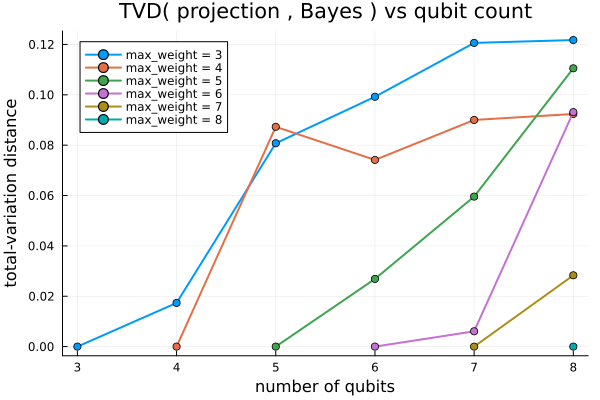

In [16]:
plt

## Boolean Fourier Analysis
Let $\chi_{S}(x) = (-1)^{S \cdot x}$ where $S, x \in \{0, 1\}^n$. Then, the $\mathcal{V} = \{\chi_{S} : S \in \{0, 1\}^n\}$ is an orthonormal basis for the set of boolean functions $f: \{0, 1\}^n \mapsto \mathbb{R}$. Now, consider the fourier coefficient $\hat{f}(S) = \langle f, \chi_S \rangle = \frac{1}{2^n} \sum_{x \in \{0, 1\}^n} f(x)\chi_S(x)$. Note that the correlation between $f, \chi_S$ equals $\langle f, \chi_S \rangle$. 

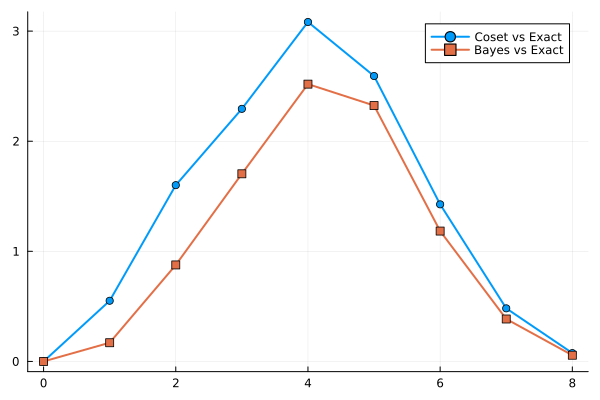

In [3]:
PauliSampling.compare_dists_boolean(8; max_weight=4)

## Marginal differences

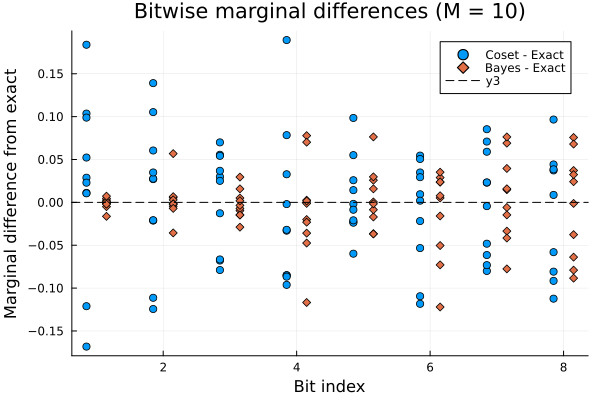

In [4]:
nq = 8
M = 10 
max_weight = 3
bit_idxs = 1:nq

circuit_nq  = build_circuit(nq)
nparams  = countparameters(circuit_nq)
init_psum = zero_state(nq)

coset_diffs = Float64[]
bayes_diffs = Float64[]
bit_labels = Int[]
method_labels = String[]

for _ in 1:M
    thetas = randn(nparams) * 0.5
    exact_psum = propagate(circuit_nq, init_psum, thetas)
    trunc_psum = propagate(circuit_nq, init_psum, thetas; max_weight=max_weight)

    exact_dist = get_dist(exact_psum, approximate_prob)
    coset_dist = get_dist(trunc_psum, projection_prob)
    bayes_dist = get_dist(trunc_psum, approximate_prob)

    exact_margs = bit_marginals(nq, exact_dist)
    coset_margs = bit_marginals(nq, coset_dist)
    bayes_margs = bit_marginals(nq, bayes_dist)

    for j in 1:nq
        push!(bit_labels, j)
        push!(method_labels, "Coset")
        push!(coset_diffs, coset_margs[j] - exact_margs[j])

        push!(bit_labels, j)
        push!(method_labels, "Bayes")
        push!(bayes_diffs, bayes_margs[j] - exact_margs[j])
    end
end

x_coset = bit_labels[1:2:end] .- 0.15
x_bayes = bit_labels[2:2:end] .+ 0.15

scatter(x_coset, coset_diffs; label="Coset - Exact", marker=:circle, ms=4)
scatter!(x_bayes, bayes_diffs; label="Bayes - Exact", marker=:diamond, ms=4)

xlabel!("Bit index")
ylabel!("Marginal difference from exact")
title!("Bitwise marginal differences (M = $M)")
hline!([0.0]; lw=1, lc=:black, ls=:dash)

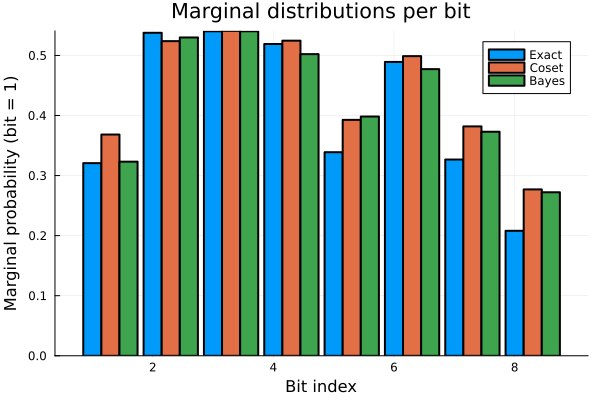

In [6]:
nq = 8
max_weight = 3
circuit  = build_circuit(nq)
nparams  = countparameters(circuit)
thetas = randn(nparams) * 0.5;
init_psum = zero_state(nq)
exact_psum = propagate(circuit, init_psum, thetas)
trunc_psum = propagate(circuit, init_psum, thetas; max_weight=max_weight)

exact_dist = get_dist(exact_psum, approximate_prob)
coset_dist = get_dist(trunc_psum, projection_prob)
bayes_dist = get_dist(trunc_psum, approximate_prob)

exact_margs = bit_marginals(nq, exact_dist)
coset_margs = bit_marginals(nq, coset_dist)
bayes_margs = bit_marginals(nq, bayes_dist)

bit_idxs = 1:nq
bar(bit_idxs, exact_margs; label="Exact", lw=2, bar_width=0.3)
bar!(bit_idxs .+ 0.3, coset_margs; label="Coset", lw=2, bar_width=0.3)
bar!(bit_idxs .+ 0.6, bayes_margs; label="Bayes", lw=2, bar_width=0.3)

xlabel!("Bit index")
ylabel!("Marginal probability (bit = 1)")
title!("Marginal distributions per bit")

## Negativity

In [27]:
max_nq = 8
x_neg = collect(1:max_nq)
y_neg = Vector{Float64}(undef, max_nq)
fill!(y_neg, 0.0)

M = 5

for nq in x_neg
    @show nq
    init_psum = zero_state(nq)
    max_weight = min(max(1, nq ÷ 2), 4)
    circuit_nq = build_circuit(nq)
    nparams = countparameters(circuit_nq)
    for _ in 1:M
        thetas = randn(nparams) * 0.5;
        prop_psum = propagate(circuit_nq, init_psum, thetas; max_weight=max_weight)
        prop_lin_map = PauliSampling.build_lin_map(prop_psum)
        y_neg[nq] += PauliSampling.compute_negativity(prop_lin_map);
    end
end
y_neg /= M

nq = 1
nq = 2
nq = 3
nq = 4
nq = 5
nq = 6
nq = 7
nq = 8


8-element Vector{Float64}:
 1.4244695193803274e-17
 0.09126258026272609
 0.05422704808214799
 0.353965486577133
 0.4758156506329982
 0.8273601828763191
 1.002719132931918
 1.6575144108242683

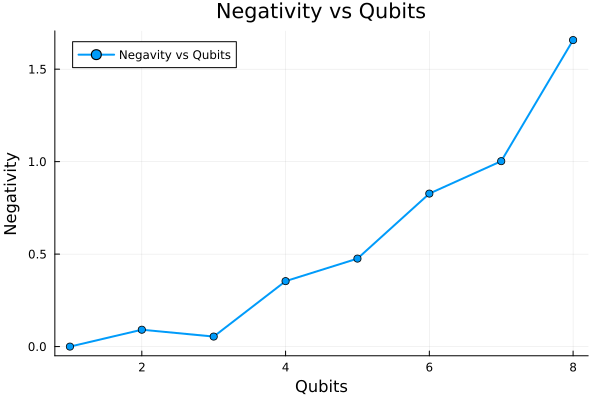

In [28]:
@show 
plt_neg = plot(x_neg, y_neg; label="Negavity vs Qubits", lw=2, marker=:circle)
xlabel!(plt_neg, "Qubits")
ylabel!(plt_neg, "Negativity")
title!(plt_neg, "Negativity vs Qubits")
display(plt_neg)

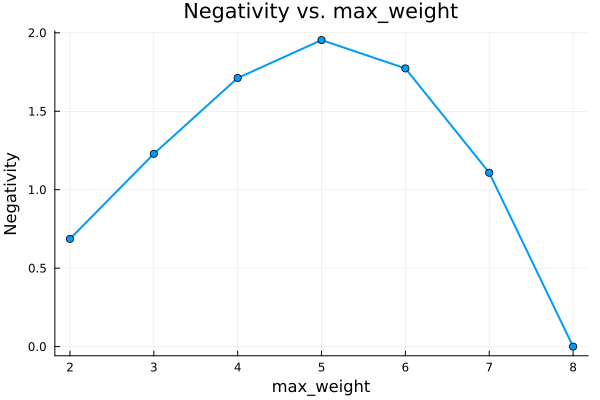

In [7]:
nq = 8
weights = 2:nq
negativities = Float64[]

init_psum = zero_state(nq)
circuit_nq = build_circuit(nq)
nparams = countparameters(circuit_nq)
thetas = randn(nparams) * 0.5

for w in weights
    trunc_psum = propagate(circuit_nq, init_psum, thetas; max_weight=w)    
    prop_lin_map = PauliSampling.build_lin_map(trunc_psum)    
    push!(negativities, PauliSampling.compute_negativity(prop_lin_map))
end

plot(weights, negativities;
        xlabel="max_weight",
        ylabel="Negativity",
        title="Negativity vs. max_weight",
        marker=:circle,
        legend=false,
        linewidth=2)

## Entropy

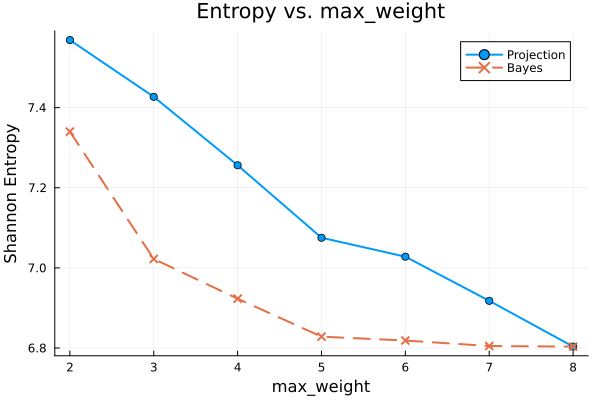

In [6]:
nq = 8
weights = 2:nq
entropy_coset = Float64[]
entropy_approx = Float64[]

init_psum = zero_state(nq)
circuit_nq = build_circuit(nq)
nparams = countparameters(circuit_nq)
thetas = randn(nparams) * 0.5



for w in weights
    trunc_psum = propagate(circuit_nq, init_psum, thetas; max_weight=w)
    # Compute Shannon entropy of projection and Bayesian distributions
    push!(entropy_coset, shannon_entropy(get_dist(trunc_psum, projection_prob)))
    push!(entropy_approx, shannon_entropy(get_dist(trunc_psum, approximate_prob)))
end

# Plot
plot(weights, entropy_coset;
        label="Projection", marker=:circle, linewidth=2)

plot!(weights, entropy_approx;
        label="Bayes", marker=:x, linestyle=:dash, linewidth=2)

xlabel!("max_weight")
ylabel!("Shannon Entropy")
title!("Entropy vs. max_weight")
plot!(legend=:topright)